## Classification of survival of passengers based on logistic regression classification

In [920]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [921]:
# Reading the data file
train = pd.read_csv(r"C:\Users\ASUS\Desktop\Titanic\train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [922]:
# Dimension of train dataset
train.shape

(891, 12)

In [923]:
# Basic information about all columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [924]:
# Descriptive statistics of numerical columns
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Performing EDA

In [926]:
# Checking for missing values
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [927]:
# Drop the values in those columns that have missing values numbers less than 5% of total records
ref = 0.05 * len(train)
cols_drop = train.columns[train.isna().sum() <= ref]
train.dropna(subset=cols_drop, inplace = True)
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Pclass
3    491
1    214
2    184
Name: count, dtype: int64


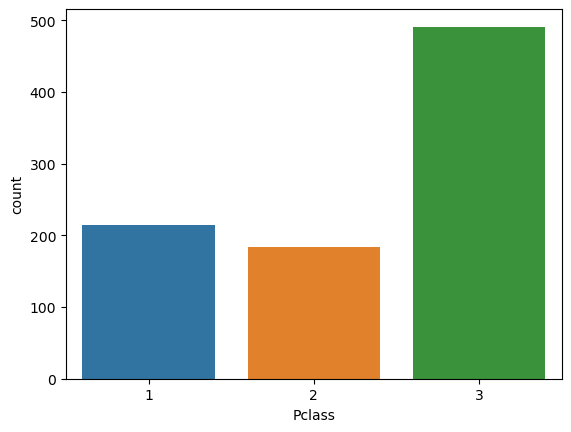

In [928]:
# Passanger Class distribution
print(train['Pclass'].value_counts())
sns.countplot(data=train, x='Pclass')
plt.show()

Sex
male      577
female    312
Name: count, dtype: int64


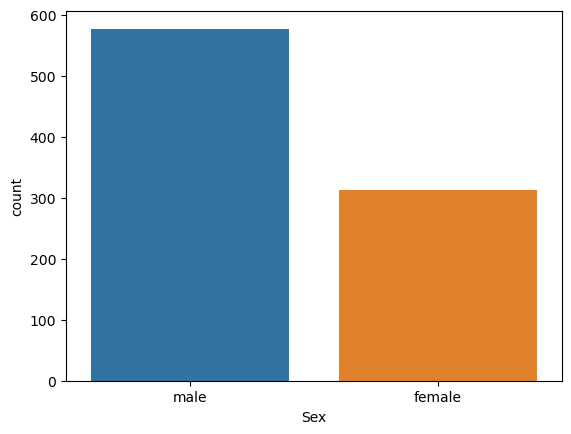

In [929]:
# Sex distribution
print(train['Sex'].value_counts())
sns.countplot(data=train, x='Sex')
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


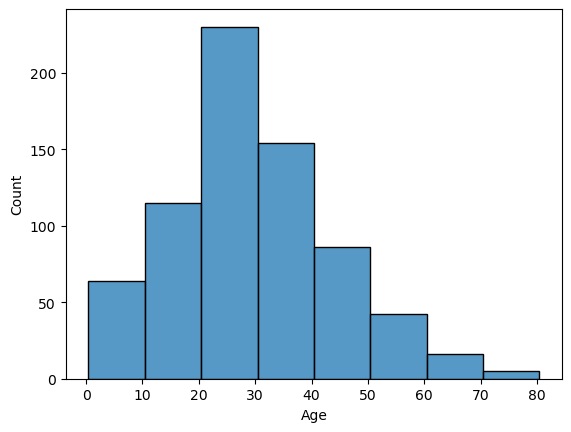

In [930]:
# Age distribution
sns.histplot(data=train, x='Age', binwidth=10)
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


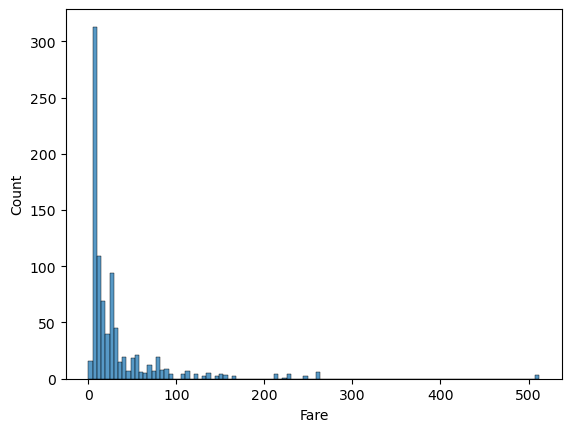

In [931]:
# Fare distribution
sns.histplot(data=train, x='Fare')
plt.show()

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: count, dtype: int64


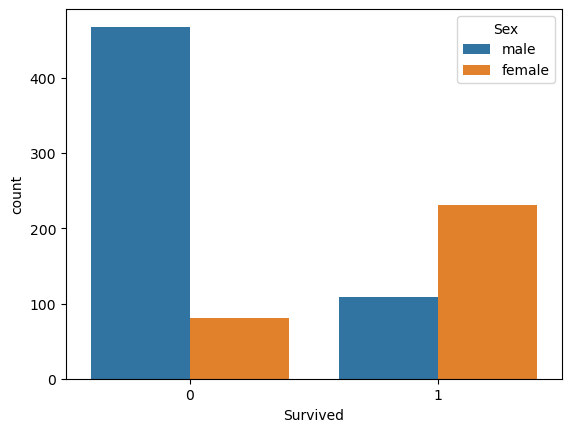

In [932]:
# Survived Distribution
print(train.groupby('Sex')['Survived'].value_counts())
sns.countplot(data=train, x='Survived', hue='Sex')
plt.show()

In [933]:
# Dropping irrelevant columns from dataframe i.e Name, Ticket, Cabin
train = train.drop(columns=['Name', 'Ticket', 'Cabin'])
train.shape

(889, 9)

In [934]:
# Dummy variables for Sex and Embarked columns
sex_dummies = pd.get_dummies(train['Sex'], drop_first=True).astype(int)
embarked_dummies = pd.get_dummies(train['Embarked'], drop_first = True).astype(int)

In [935]:
# Adding these dummies to the train data frame
train = pd.concat([train, sex_dummies, embarked_dummies], axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [936]:
# Droppping the Sex and Embarked column so that train dataset is ready for the input to the machine learning model
train.drop(columns=['Sex', 'Embarked'], inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Logistic Regression

In [938]:
# Getting features, target labels and splitting the data 
X = train.drop(columns='Survived').values
y = train['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 125)

In [939]:
# Impute these values with the median age of the X_train data set

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

# Checking for Missing values in X_train, X_test
print("No. of missing values in X_train : ", np.isnan(X_train).sum())
print("No. of missing values in X_test : ", np.isnan(X_test).sum())

No. of missing values in X_train :  0
No. of missing values in X_test :  0


In [940]:
# Initialising Logistic Regression Classification
logreg = LogisticRegression(max_iter = 1000)

# Training the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [941]:
# Predicting for X_test
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [942]:
# Generating confusion matrix and classification report for evaluation
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ") 
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[96 12]
 [25 45]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       108
           1       0.79      0.64      0.71        70

    accuracy                           0.79       178
   macro avg       0.79      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



## Working on the test data i.e the unseen data for the model, for which the model needs to classify whether the passenger will survuive or not

In [944]:
# Reading the test data
test = pd.read_csv(r"C:\Users\ASUS\Desktop\Titanic\test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [945]:
# Dimension of the test dataframe
test.shape

(418, 11)

In [946]:
# Basic information about all the columns
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [947]:
# Desciptive statistics of all the numerical columns
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [948]:
# Check for missing values
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [949]:
# Fill the missing values with the median in case of numeric data type columns
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Check for missing values
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [950]:
# Dropping irrelevant columns from dataframe i.e Name, Ticket, Cabin
test = test.drop(columns=['Name', 'Ticket', 'Cabin'])
test.shape

(418, 8)

In [951]:
# Dummy variables for Sex and Embarked columns
sex_dummies = pd.get_dummies(test['Sex'], drop_first=True).astype(int)
embarked_dummies = pd.get_dummies(test['Embarked'], drop_first = True).astype(int)

In [952]:
# Adding these dummies to the train data frame
test = pd.concat([test, sex_dummies, embarked_dummies], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,1,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,1,1,0
3,895,3,male,27.0,0,0,8.6625,S,1,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,1


In [953]:
# Droppping the Sex and Embarked column so that train dataset is ready for the input to the machine learning model
test.drop(columns=['Sex', 'Embarked'], inplace=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [954]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [955]:
# Prediction for the test dataset
prediction = logreg.predict(test.values)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [956]:
# Final output in CSV format
titanic_prediction = pd.DataFrame({'PassengerId' : test['PassengerId'],
                                   'Survived' : prediction})
titanic_prediction.to_csv(r"C:\Users\ASUS\Desktop\Titanic\titanic_submission.csv", index=False)